<a href="https://colab.research.google.com/github/urvashii-b/Challenges2024/blob/master/mathSyntheticAnswersTrial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install openai==0.28

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 1.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Loading the dataset into a DataFrame
df = pd.read_csv("mathSyntheticTest.csv")
import re

# Handling missing values
df = df.dropna()  # Droping rows with missing values
df['extracted_answer'] = df['answer'].apply(lambda x: re.findall(r'#### (\d+)', x))

# Converting extracted numerical values to integers
df['extracted_answer'] = df['extracted_answer'].apply(lambda x: int(x[0]) if x else None)

# Removing rows with missing or invalid extracted answers
df = df.dropna(subset=['extracted_answer'])

# Removing duplicates
df = df.drop_duplicates()
df.rename(columns={'answer': 'context'}, inplace=True)
df.rename(columns={'extracted_answer': 'answer'}, inplace=True)
df

,question,context,answer
0,Janet’s ducks lay 16 eggs per day. She eats th...,Janet sells 16 - 3 - 4 = <<16-3-4=9>>9 duck eg...,18.0
1,A robe takes 2 bolts of blue fiber and half th...,It takes 2/2=<<2/2=1>>1 bolt of white fiber\nS...,3.0
2,Josh decides to try flipping a house. He buys...,The cost of the house and repairs came out to ...,70000.0
3,James decides to run 3 sprints 3 times a week....,He sprints 3*3=<<3*3=9>>9 times\nSo he runs 9*...,540.0
4,"Every day, Wendi feeds each of her chickens th...","If each chicken eats 3 cups of feed per day, t...",20.0
...,...,...,...
1314,John had a son James when he was 19. James is...,Dora is 12-3=<<12-3=9>>9\nSo James is 9*2=<<9*...,8.0
1315,There are some oranges in a basket. Ana spends...,There are 60 minutes in an hour. Ana peels an ...,5.0
1316,Mark's car breaks down and he needs to get a n...,The discount on the radiator was 400*.8=$<<400...,230.0
1317,"Farmer Brown has 20 animals on his farm, all e...",Let C be the number of chickens.\nThere are 20...,5.0


In [ ]:
# Splitting the dataset into train and test sets (70-30 ratio)
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)  # Setting random_state for reproducibility

In [ ]:
train_df.to_csv("train_mathSyntheticTest.csv", index=False)
test_df.to_csv("test_mathSyntheticTest.csv", index=False)

In [ ]:
import pandas as pd
import openai  # For OpenAI integration

# Loading training data
train_df = pd.read_csv("train_mathSyntheticTest.csv")

# Defining input and output fields
input_field = "question"
output_field = "answer"

In [ ]:
!pip install langchain
from langchain.prompts import PromptTemplate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 807.5/807.5 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.9/256.9 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.6/66.6 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 16.0 MB/s eta 0:00:00


In [ ]:
prompt_template = PromptTemplate(
    template="{question}\nSolve the problem and provide the answer:\n{answer}\n",
    input_variables=["question", "answer"]
)

In [ ]:
# import openai

# openai.api_key = "your api key"

# def train_llm_with_openai(data_list):
#     """Trains an LLM using OpenAI's Completion API.

#     Args:
#         data_list: A list of tuples containing question and answer pairs.
#     """
#     for question, answer in data_list:
#         prompt = f"Question: {question}\nAnswer: {answer}"  # Ensure prompt is a string

#         try:
#             response = openai.Completion.create(
#                 engine="gpt-3.5-turbo-instruct",
#                 prompt=prompt,
#                 max_tokens=100,  # Adjust as needed
#                 n=1,  # Generate 1 response per prompt
#                 stop=None,  # No specific stop sequence needed
#                 temperature=0.7  # Control randomness (0 = deterministic, 1 = highly random)
#             )
#         except openai.error.RateLimitError as e:
#             print(f"OpenAI Rate Limit Error: {e}")

# # Train the LLM using the training data
# train_data_list = train_df[[input_field, output_field]].to_records(index=False).tolist()
# train_llm_with_openai(train_data_list)

In [ ]:
import openai
import time  # Import time module for sleep function
import pandas as pd

openai.api_key = "your api key"

def generate_synthetic_answers_with_openai(test_df):
    """Generates synthetic answers using OpenAI's Completion API.

    Args:
        test_df: A pandas DataFrame containing test questions.

    Returns:
        A pandas DataFrame with a new column containing synthetic answers.
    """
    synthetic_answers = []
    for _, row in test_df.iterrows():
        question = row['question']  # Assuming 'question' is the column name
        prompt = f"Solve the following question:\n{question}\n"
        try:
            response = openai.Completion.create(
                engine="gpt-3.5-turbo-instruct",
                prompt=prompt,
                max_tokens=100,  # Adjust as needed for testing
                n=1,  # Generate 1 response per prompt
                stop=None,  # No specific stop sequence needed
                temperature=0.7  # Control randomness (0 = deterministic, 1 = highly random)
            )

            synthetic_answer = response.choices[0].text.strip()
        except openai.error.APIError as e:
            print(f"OpenAI API Error: {e}")
            synthetic_answer = None
        except ValueError as e:
            print(f"Value Error: {e}")
            synthetic_answer = None
        except Exception as e:
            print(f"Unexpected Error: {e}")
            synthetic_answer = None
        synthetic_answers.append(synthetic_answer)

    test_df["synthetic_answer"] = synthetic_answers
    return test_df

# Load your test data
test_df = pd.read_csv("test_mathSyntheticTest.csv")  # Assuming filename

# Generate synthetic answers for the test set
test_df = generate_synthetic_answers_with_openai(test_df)

# Print or evaluate the results
print(test_df)  # Or analyze the synthetic answers for accuracy and performance

                                              question  \
0    There are 9,300 pennies in a cup. What is the ...   
1    Buford writes many checks every year.  Once pe...   
2    John plans to save money from working.  He get...   
3    Richard lives in an apartment building with 15...   
4    A plague infects ten people. Every day, each i...   
..                                                 ...   
391  Errol bought a computer, 2 monitors, and a pri...   
392  In a candy machine, there are 22 more than fou...   
393  Avery needs to buy a 3 piece place setting (di...   
394  Digimon had its 20th anniversary.  When it cam...   
395  Carlos and Benji are at the beach. Carlos rent...   

                                               context  answer  \
0    A third of the pennies in a cup is 9,300/3 = <...    62.0   
1    Once per month he writes a check to pay the el...    52.0   
2    He gets paid 2*5=$<<2*5=10>>10 a day.\nSo he g...     2.0   
3    The total number of units in the b

In [ ]:
test_df

,question,context,answer,synthetic_answer
0,"There are 9,300 pennies in a cup. What is the ...","A third of the pennies in a cup is 9,300/3 = <...",62.0,"To solve this question, we first need to find ..."
1,Buford writes many checks every year. Once pe...,Once per month he writes a check to pay the el...,52.0,Buford writes a total of 26 (12 for electric b...
2,John plans to save money from working. He get...,He gets paid 2*5=$<<2*5=10>>10 a day.\nSo he g...,2.0,To find the number of weeks it will take John ...
3,Richard lives in an apartment building with 15...,The total number of units in the building will...,30.0,To find the total number of unoccupied units i...
4,"A plague infects ten people. Every day, each i...","On the first day, the original ten people infe...",3430.0,"After the first day, the ten infected people h..."
...,...,...,...,...
391,"Errol bought a computer, 2 monitors, and a pri...",He paid 1100-400=<<1100-400=700>>700 for the p...,300.0,Let x be the cost of one monitor.\n\nWe know t...
392,"In a candy machine, there are 22 more than fou...",Four times the number of blue gumballs is 12*4...,70.0,"To solve this question, we can set up an equat..."
393,Avery needs to buy a 3 piece place setting (di...,Each place setting will need a dinner plate th...,180.0,To calculate how much Avery will spend on plac...
394,Digimon had its 20th anniversary. When it cam...,When Digimon came out John would have been 28-...,24.0,"To solve this question, we can set up an equat..."


In [ ]:
test_df.to_csv("mathSyntheticGPT3.5.csv", index=False)

In [35]:
def check_synthetic_answers(dataframe):
    numeric_answers = []

    for index, row in dataframe.iterrows():
        synthetic_answer = row['synthetic_answer']
        try:
            # Attempt to convert the synthetic answer to float
            numeric_answer = float(synthetic_answer)
            numeric_answers.append(numeric_answer)
        except ValueError:
            # If conversion fails, the answer is not numeric
            print(f"Row {index}: Synthetic answer '{synthetic_answer}' is not numeric.")

    return numeric_answers

# Call the function to check synthetic answers
numeric_answers = check_synthetic_answers(test_df)
print("Numeric answers:", numeric_answers)

Row 0: Synthetic answer 'To solve this question, we first need to find out how many pennies are in two thirds of the cup. To find this, we can use the fraction 2/3 and multiply it by the total number of pennies in the cup (9,300). This can be written as:

2/3 x 9,300 = 6,200

So, there are 6,200 pennies in two thirds of the cup. Now, we need to find the total' is not numeric.
Row 1: Synthetic answer 'Buford writes a total of 26 (12 for electric bill + 12 for gas bill + 24 for church + 4 for pest and lawn service) checks per year.' is not numeric.
Row 2: Synthetic answer 'To find the number of weeks it will take John to save $80, we can use the following equation:

Total amount saved = (hourly pay) x (hours worked per day) x (number of days per week) x (number of weeks)

Therefore, we can set up the equation as follows:

$80 = ($2/hour) x (5 hours/day) x (4 days/week) x (number of weeks)

Simplifying the equation, we get:' is not numeric.
Row 3: Synthetic answer 'To find the total numbe

In [36]:
import pandas as pd
import re

df = pd.DataFrame(test_df)

# Function to extract numerical answer using regular expressions
def extract_numerical_answer(synthetic_answer):
    # Regular expression pattern to match numbers or numeric expressions
    pattern = r'[-+]?\d*\.\d+|\d+'
    # Find all matches in the synthetic answer string
    matches = re.findall(pattern, synthetic_answer)
    # Return the first match found (assuming there's only one numerical value in the synthetic answer)
    if matches:
        return float(matches[0])  # Convert the match to float if found
    else:
        return None  # Return None if no numerical value found

# Apply the function to the 'synthetic_answer' column
df['extracted_answer'] = df['synthetic_answer'].apply(extract_numerical_answer)

print(df[['synthetic_answer', 'extracted_answer']])


                                      synthetic_answer  extracted_answer
0    To solve this question, we first need to find ...               2.0
1    Buford writes a total of 26 (12 for electric b...              26.0
2    To find the number of weeks it will take John ...              80.0
3    To find the total number of unoccupied units i...              15.0
4    After the first day, the ten infected people h...              60.0
..                                                 ...               ...
391  Let x be the cost of one monitor.\n\nWe know t...               1.0
392  To solve this question, we can set up an equat...              22.0
393  To calculate how much Avery will spend on plac...               6.0
394  To solve this question, we can set up an equat...              28.0
395  To find the total cost, we need to multiply th...              30.0

[396 rows x 2 columns]


In [26]:
import openai
import time  # Import time module for sleep function
import pandas as pd

openai.api_key = "your api key"

def generate_synthetic_answers_with_openai(test_df):
    """Generates synthetic answers using OpenAI's Completion API.

    Args:
        test_df: A pandas DataFrame containing test questions.

    Returns:
        A pandas DataFrame with a new column containing synthetic answers.
    """
    synthetic_answers = []
    for _, row in test_df.iterrows():
        question = row['question']  # Assuming 'question' is the column name
        prompt = f"Keep it extremely short and only give number or expression as final output by solving this question:\n{question}\n"
        try:
            response = openai.Completion.create(
                engine="davinci-002",
                prompt=prompt,
                max_tokens=100,  # Adjust as needed for testing
                n=1,  # Generate 1 response per prompt
                stop=None,  # No specific stop sequence needed
                temperature=0.7  # Control randomness (0 = deterministic, 1 = highly random)
            )

            synthetic_answer = response.choices[0].text.strip()
        except openai.error.APIError as e:
            print(f"OpenAI API Error: {e}")
            synthetic_answer = None
        except ValueError as e:
            print(f"Value Error: {e}")
            synthetic_answer = None
        except Exception as e:
            print(f"Unexpected Error: {e}")
            synthetic_answer = None
        synthetic_answers.append(synthetic_answer)

    test_df["synthetic_answer"] = synthetic_answers
    return test_df

# Load your test data
test_df2 = pd.read_csv("test_mathSyntheticTest.csv")  # Assuming filename

# Generate synthetic answers for the test set
test_df2 = generate_synthetic_answers_with_openai(test_df2)

# Print or evaluate the results
print(test_df2)  # Or analyze the synthetic answers for accuracy and performance

                                              question  \
0    There are 9,300 pennies in a cup. What is the ...   
1    Buford writes many checks every year.  Once pe...   
2    John plans to save money from working.  He get...   
3    Richard lives in an apartment building with 15...   
4    A plague infects ten people. Every day, each i...   
..                                                 ...   
391  Errol bought a computer, 2 monitors, and a pri...   
392  In a candy machine, there are 22 more than fou...   
393  Avery needs to buy a 3 piece place setting (di...   
394  Digimon had its 20th anniversary.  When it cam...   
395  Carlos and Benji are at the beach. Carlos rent...   

                                               context  answer  \
0    A third of the pennies in a cup is 9,300/3 = <...    62.0   
1    Once per month he writes a check to pay the el...    52.0   
2    He gets paid 2*5=$<<2*5=10>>10 a day.\nSo he g...     2.0   
3    The total number of units in the b

In [27]:
test_df2.to_csv("mathSyntheticDAVINCI002.csv", index=False)

In [37]:
import pandas as pd
import re

df2 = pd.DataFrame(test_df2)

# Function to extract numerical answer using regular expressions
def extract_numerical_answer(synthetic_answer):
    # Regular expression pattern to match numbers or numeric expressions
    pattern = r'[-+]?\d*\.\d+|\d+'
    # Find all matches in the synthetic answer string
    matches = re.findall(pattern, synthetic_answer)
    # Return the first match found (assuming there's only one numerical value in the synthetic answer)
    if matches:
        return float(matches[0])  # Convert the match to float if found
    else:
        return None  # Return None if no numerical value found

# Apply the function to the 'synthetic_answer' column
df2['extracted_answer'] = df2['synthetic_answer'].apply(extract_numerical_answer)

print(df2[['synthetic_answer', 'extracted_answer']])


                                      synthetic_answer  extracted_answer
0    1. $2.00 2. $2.07 3. $2.10 4. $2.17\n\n120. A ...               1.0
1    OP: 12\n\nBiscuitBirds: Correct. \n\nThe other...              12.0
2    A: 1\n\nQ: In the following problem, please si...               1.0
3    4. Math Word Problems\nMath word problems are ...               4.0
4    A) 43\nB) 37\nC) 31\nD) 53\nE) 47\nAnswer: A\n...              43.0
..                                                 ...               ...
391  A: $400\n\nQ: The product of three consecutive...             400.0
392  No one gets it right and they all struggle. So...              22.0
393  I only want the final answer which is $60.00. ...              60.0
394                                                                  NaN
395  2.2.4.2. The Math Question\nThis is basically ...               2.2

[396 rows x 2 columns]


In [43]:
nan_rows = df2[df2['extracted_answer'].isna()]

print("NaN rows:")
print(nan_rows)

NaN rows:
                                              question  \
15   Aiden and 12 of his friends are going to see a...   
24   Marcus is trying to decide whether he really n...   
43   Antoine's french onion soup recipe calls for 2...   
46   Aleena subscribed to a streaming service that ...   
49   Naruto can lift a mountain ten times higher th...   
57   Tim decides to light off some fireworks for th...   
71   Doctor Jones is scheduling his time for Monday...   
77   Shelly's 3 kids spent all day at the water par...   
80   Stephen placed an online order for groceries. ...   
81   John drinks a bottle of water every half hour....   
85   According to its nutritional info, a bag of ch...   
92   John just started watching a new show.  Each e...   
110  John takes care of 10 dogs.  Each dog takes .5...   
140  Charlotte went into the kitchen supply store k...   
159  If Mark weighs 150 pounds and Susan weighs 20 ...   
178  Judy teaches 5 dance classes, every day, on th...   
188 

In [44]:
nan_rows = df[df['extracted_answer'].isna()]

print("NaN rows:")
print(nan_rows)

NaN rows:
Empty DataFrame
Columns: [question, context, answer, synthetic_answer, extracted_answer]
Index: []


In [29]:
!pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=ea3eb1515834feb278ebeeb941bd4006c15de5363be2cf8e0bb95657f1ca1946
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [30]:
from rouge_score import rouge_scorer

In [31]:
from nltk.translate.bleu_score import sentence_bleu
from rouge_score import rouge_scorer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Define a function to calculate the BLEU score
def calculate_bleu_score(reference, candidate):
    reference = [reference.split()]
    candidate = candidate.split()
    return sentence_bleu(reference, candidate)

# Define a function to calculate the ROUGE score
def calculate_rouge_score(reference, candidate):
    scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)
    scores = scorer.score(reference, candidate)
    return scores['rougeL'].fmeasure

# Define a function to calculate semantic similarity using cosine similarity
def calculate_cosine_similarity(reference, candidate):
    vectorizer = TfidfVectorizer()
    vectors = vectorizer.fit_transform([reference, candidate])
    similarity = cosine_similarity(vectors[0], vectors[1])[0][0]
    return similarity

# Define a function to calculate F1 score
def calculate_f1_score(true_positives, false_positives, false_negatives):
    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)
    f1 = 2 * (precision * recall) / (precision + recall)
    return f1


In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [46]:
# Remove NaN rows from df
df = df.dropna()

# Remove NaN rows from df2
df2 = df2.dropna()

In [48]:
df

,question,context,answer,synthetic_answer,extracted_answer
0,"There are 9,300 pennies in a cup. What is the ...","A third of the pennies in a cup is 9,300/3 = <...",62.0,"To solve this question, we first need to find ...",2.0
1,Buford writes many checks every year. Once pe...,Once per month he writes a check to pay the el...,52.0,Buford writes a total of 26 (12 for electric b...,26.0
2,John plans to save money from working. He get...,He gets paid 2*5=$<<2*5=10>>10 a day.\nSo he g...,2.0,To find the number of weeks it will take John ...,80.0
3,Richard lives in an apartment building with 15...,The total number of units in the building will...,30.0,To find the total number of unoccupied units i...,15.0
4,"A plague infects ten people. Every day, each i...","On the first day, the original ten people infe...",3430.0,"After the first day, the ten infected people h...",60.0
...,...,...,...,...,...
391,"Errol bought a computer, 2 monitors, and a pri...",He paid 1100-400=<<1100-400=700>>700 for the p...,300.0,Let x be the cost of one monitor.\n\nWe know t...,1.0
392,"In a candy machine, there are 22 more than fou...",Four times the number of blue gumballs is 12*4...,70.0,"To solve this question, we can set up an equat...",22.0
393,Avery needs to buy a 3 piece place setting (di...,Each place setting will need a dinner plate th...,180.0,To calculate how much Avery will spend on plac...,6.0
394,Digimon had its 20th anniversary. When it cam...,When Digimon came out John would have been 28-...,24.0,"To solve this question, we can set up an equat...",28.0


In [49]:
df2

,question,context,answer,synthetic_answer,extracted_answer
0,"There are 9,300 pennies in a cup. What is the ...","A third of the pennies in a cup is 9,300/3 = <...",62.0,1. $2.00 2. $2.07 3. $2.10 4. $2.17\n\n120. A ...,1.0
1,Buford writes many checks every year. Once pe...,Once per month he writes a check to pay the el...,52.0,OP: 12\n\nBiscuitBirds: Correct. \n\nThe other...,12.0
2,John plans to save money from working. He get...,He gets paid 2*5=$<<2*5=10>>10 a day.\nSo he g...,2.0,"A: 1\n\nQ: In the following problem, please si...",1.0
3,Richard lives in an apartment building with 15...,The total number of units in the building will...,30.0,4. Math Word Problems\nMath word problems are ...,4.0
4,"A plague infects ten people. Every day, each i...","On the first day, the original ten people infe...",3430.0,A) 43\nB) 37\nC) 31\nD) 53\nE) 47\nAnswer: A\n...,43.0
...,...,...,...,...,...
390,Ronnie was given $5 while Rissa was given thri...,Rissa was given $5 x 3 = $<<5*3=15>>15.\nAfter...,2.0,1) $1.25\n2) $2.50\n3) $3.25\n4) $1.50\n5) $1....,1.0
391,"Errol bought a computer, 2 monitors, and a pri...",He paid 1100-400=<<1100-400=700>>700 for the p...,300.0,A: $400\n\nQ: The product of three consecutive...,400.0
392,"In a candy machine, there are 22 more than fou...",Four times the number of blue gumballs is 12*4...,70.0,No one gets it right and they all struggle. So...,22.0
393,Avery needs to buy a 3 piece place setting (di...,Each place setting will need a dinner plate th...,180.0,I only want the final answer which is $60.00. ...,60.0


In [50]:
rows_to_delete = [15, 24, 43, 46, 49, 57, 71, 77, 80, 81, 85, 92, 110, 140, 159, 178, 188, 196, 197, 218, 256, 273, 277, 279, 321, 327, 368, 369, 372, 375, 379, 394]

# Delete rows from df
df = df.drop(rows_to_delete)


In [51]:
df

,question,context,answer,synthetic_answer,extracted_answer
0,"There are 9,300 pennies in a cup. What is the ...","A third of the pennies in a cup is 9,300/3 = <...",62.0,"To solve this question, we first need to find ...",2.0
1,Buford writes many checks every year. Once pe...,Once per month he writes a check to pay the el...,52.0,Buford writes a total of 26 (12 for electric b...,26.0
2,John plans to save money from working. He get...,He gets paid 2*5=$<<2*5=10>>10 a day.\nSo he g...,2.0,To find the number of weeks it will take John ...,80.0
3,Richard lives in an apartment building with 15...,The total number of units in the building will...,30.0,To find the total number of unoccupied units i...,15.0
4,"A plague infects ten people. Every day, each i...","On the first day, the original ten people infe...",3430.0,"After the first day, the ten infected people h...",60.0
...,...,...,...,...,...
390,Ronnie was given $5 while Rissa was given thri...,Rissa was given $5 x 3 = $<<5*3=15>>15.\nAfter...,2.0,Let x be the amount of money Ronnie had origin...,5.0
391,"Errol bought a computer, 2 monitors, and a pri...",He paid 1100-400=<<1100-400=700>>700 for the p...,300.0,Let x be the cost of one monitor.\n\nWe know t...,1.0
392,"In a candy machine, there are 22 more than fou...",Four times the number of blue gumballs is 12*4...,70.0,"To solve this question, we can set up an equat...",22.0
393,Avery needs to buy a 3 piece place setting (di...,Each place setting will need a dinner plate th...,180.0,To calculate how much Avery will spend on plac...,6.0


In [53]:
# Define a function to evaluate the metrics for a given dataframe
def evaluate_metrics(dataframe):

    rouge_scores = []
    absolute_errors = []
    squared_errors = []

    for index, row in dataframe.iterrows():
        reference = str(row['answer'])
        candidate = str(row['extracted_answer'])


        # Calculate ROUGE score
        rouge_score = calculate_rouge_score(reference, candidate)
        rouge_scores.append(rouge_score)

        # Calculate absolute error
        absolute_error = mean_absolute_error([float(reference)], [float(candidate)])
        absolute_errors.append(absolute_error)

        # Calculate squared error
        squared_error = mean_squared_error([float(reference)], [float(candidate)])
        squared_errors.append(squared_error)


    mean_absolute_error_val = np.mean(absolute_errors)
    mean_squared_error_val = np.mean(squared_errors)

    return {

        'Mean Absolute Error': mean_absolute_error_val,
        'Mean Squared Error': mean_squared_error_val
    }

# Evaluate metrics for test_df (gpt-3.5-turbo-instruct)
metrics_test_df = evaluate_metrics(df)

# Evaluate metrics for test_df2 (davinci-002)
metrics_test_df2 = evaluate_metrics(df2)

print("Metrics for test_df (gpt-3.5-turbo-instruct):")
print(metrics_test_df)

print("\nMetrics for test_df2 (davinci-002):")
print(metrics_test_df2)


Metrics for test_df (gpt-3.5-turbo-instruct):
{'Mean Absolute Error': 2534.8883516483515, 'Mean Squared Error': 280373691.09832305}

Metrics for test_df2 (davinci-002):
{'Mean Absolute Error': 2490.366032967033, 'Mean Squared Error': 262743986.77589542}


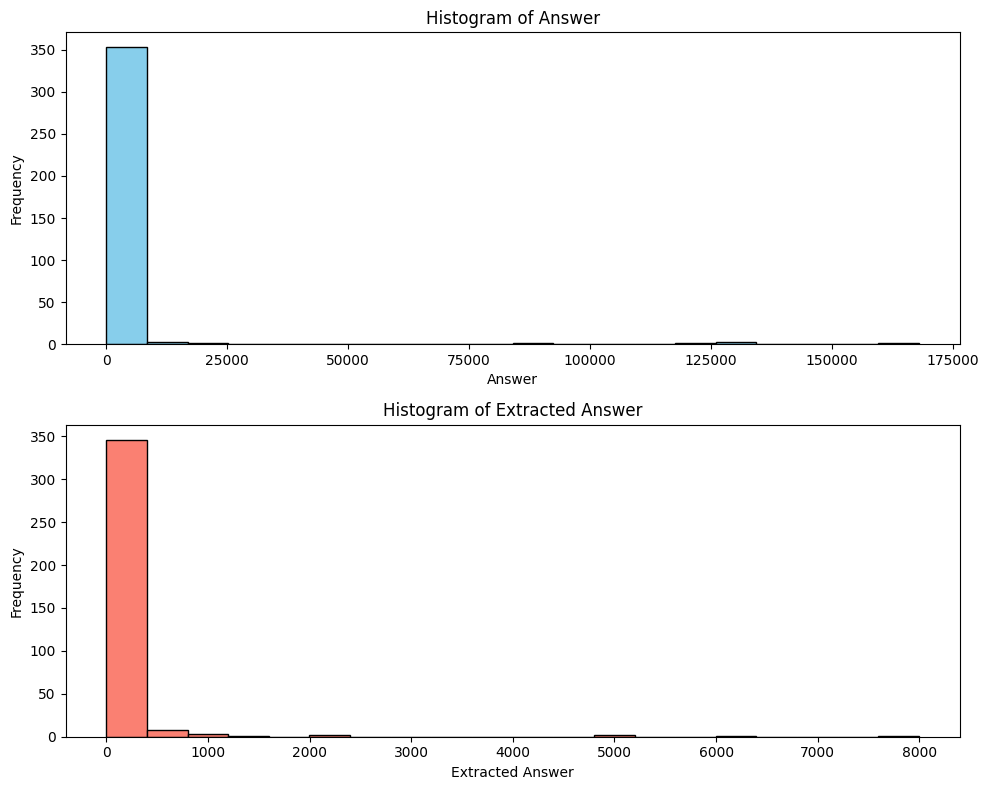

In [54]:
import matplotlib.pyplot as plt

# Remove NaN values from 'extracted_answer' column
df_cleaned = df.dropna(subset=['extracted_answer'])

# Convert 'answer' and 'extracted_answer' columns to numeric
df_cleaned['answer'] = pd.to_numeric(df_cleaned['answer'])
df_cleaned['extracted_answer'] = pd.to_numeric(df_cleaned['extracted_answer'])

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Histogram for 'answer' column
axs[0].hist(df_cleaned['answer'], bins=20, color='skyblue', edgecolor='black')
axs[0].set_title('Histogram of Answer')
axs[0].set_xlabel('Answer')
axs[0].set_ylabel('Frequency')

# Histogram for 'extracted_answer' column
axs[1].hist(df_cleaned['extracted_answer'], bins=20, color='salmon', edgecolor='black')
axs[1].set_title('Histogram of Extracted Answer')
axs[1].set_xlabel('Extracted Answer')
axs[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


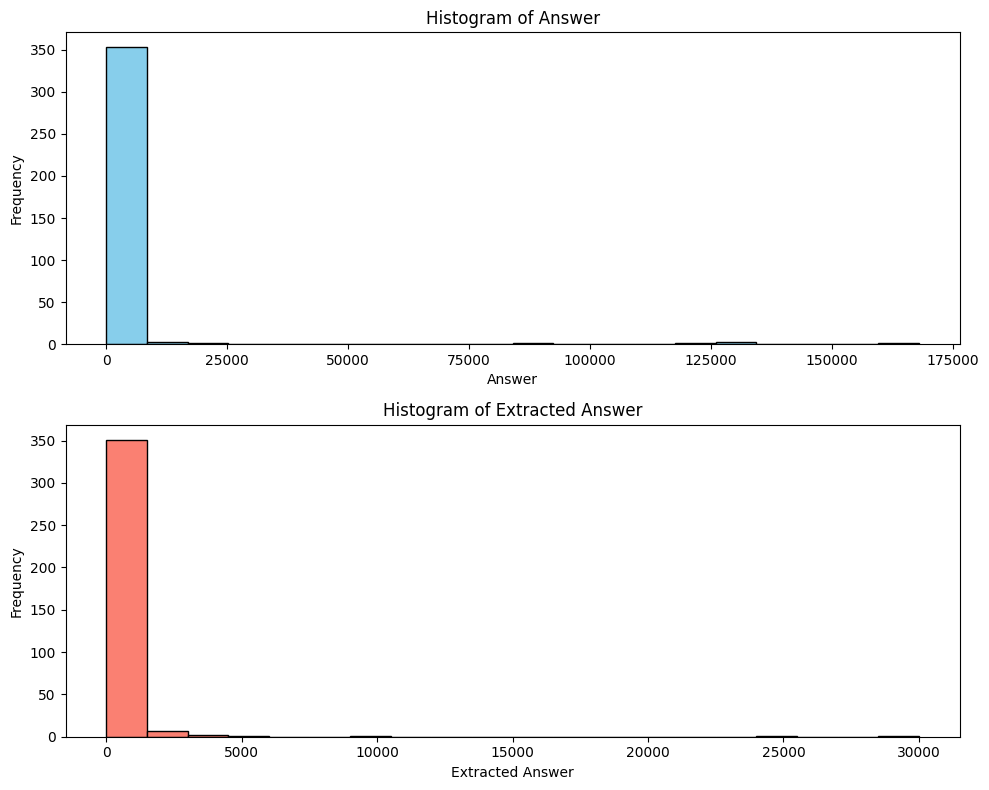

In [55]:
import matplotlib.pyplot as plt

# Remove NaN values from 'extracted_answer' column
df_cleaned2 = df2.dropna(subset=['extracted_answer'])

# Convert 'answer' and 'extracted_answer' columns to numeric
df_cleaned2['answer'] = pd.to_numeric(df_cleaned2['answer'])
df_cleaned2['extracted_answer'] = pd.to_numeric(df_cleaned2['extracted_answer'])

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Histogram for 'answer' column
axs[0].hist(df_cleaned2['answer'], bins=20, color='skyblue', edgecolor='black')
axs[0].set_title('Histogram of Answer')
axs[0].set_xlabel('Answer')
axs[0].set_ylabel('Frequency')

# Histogram for 'extracted_answer' column
axs[1].hist(df_cleaned2['extracted_answer'], bins=20, color='salmon', edgecolor='black')
axs[1].set_title('Histogram of Extracted Answer')
axs[1].set_xlabel('Extracted Answer')
axs[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


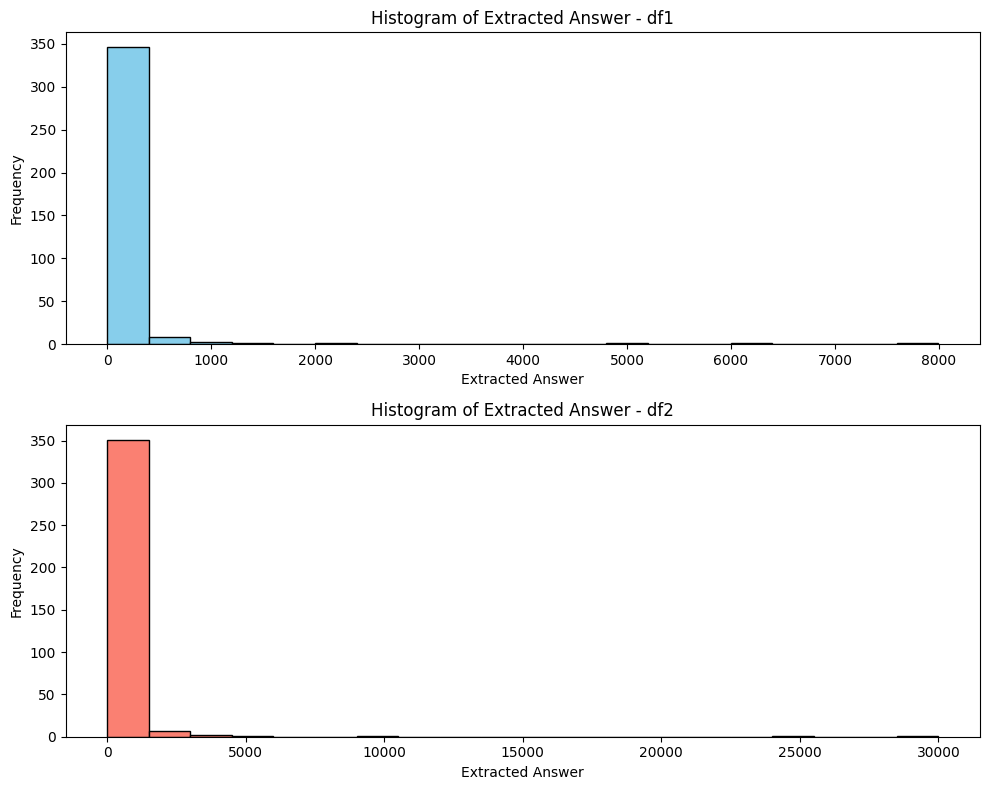

In [56]:
# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Histogram for 'extracted_answer' column in df1
axs[0].hist(df_cleaned['extracted_answer'], bins=20, color='skyblue', edgecolor='black')
axs[0].set_title('Histogram of Extracted Answer - df1')
axs[0].set_xlabel('Extracted Answer')
axs[0].set_ylabel('Frequency')

# Histogram for 'extracted_answer' column in df2
axs[1].hist(df_cleaned2['extracted_answer'], bins=20, color='salmon', edgecolor='black')
axs[1].set_title('Histogram of Extracted Answer - df2')
axs[1].set_xlabel('Extracted Answer')
axs[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()